In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
os.chdir("C:/Users/Dell/BusinessAnalyst/5.CreditCardFraudDetection")
os.getcwd()

'C:\\Users\\Dell\\BusinessAnalyst\\5.CreditCardFraudDetection'

In [3]:
dataset = pd.read_csv("creditcardfrauddetection.csv")
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Missing Value Analysis

In [4]:
missing_value = pd.DataFrame(dataset.isnull().sum())
missing_value

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


#### We do not have any missing value

In [5]:
fraudulent = dataset[(dataset['Class'] == 1)]
fraudulent.shape

(492, 31)

# Outlier Analysis

In [6]:
data1 = dataset.copy()

### Outlier analysis using Boxplot

Time


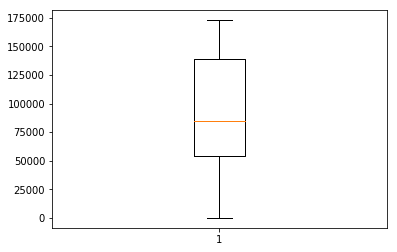

V1


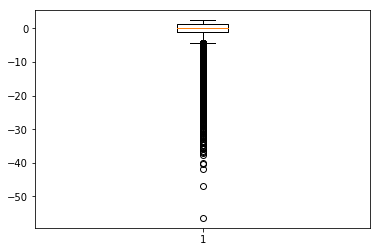

V2


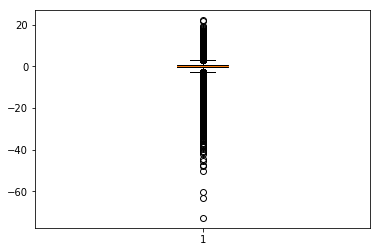

V3


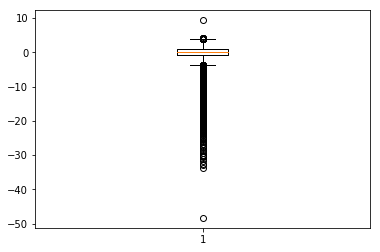

V4


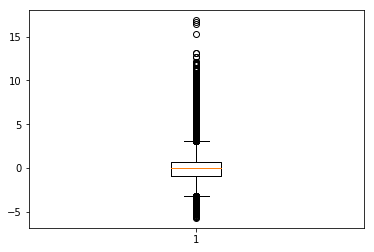

V5


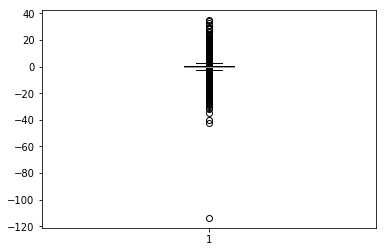

V6


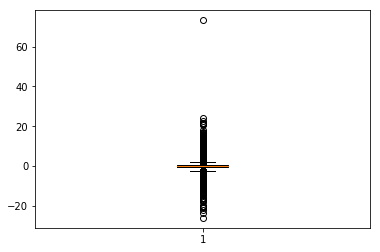

V7


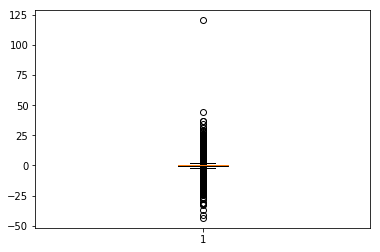

V8


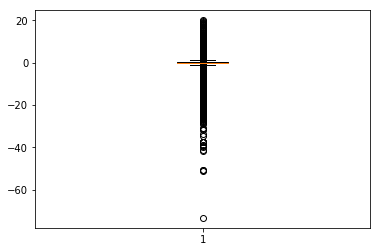

V9


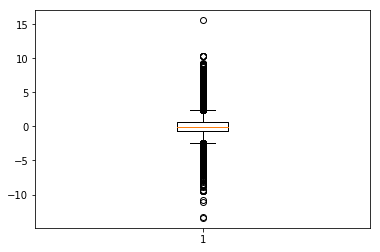

V10


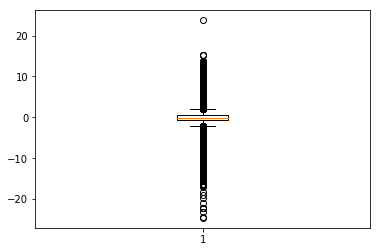

V11


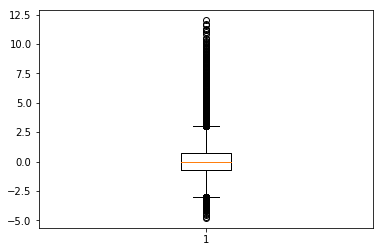

V12


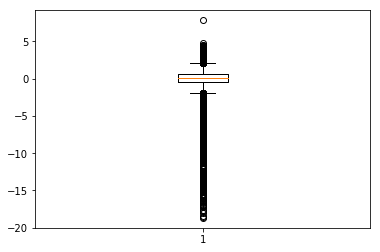

V13


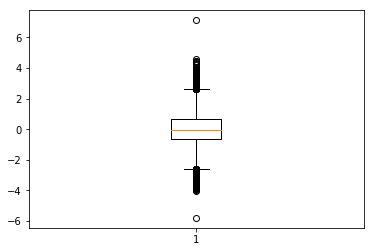

V14


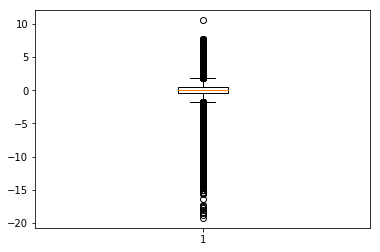

V15


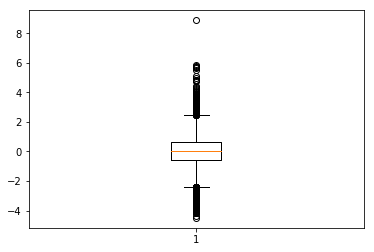

V16


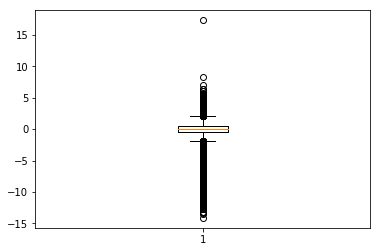

V17


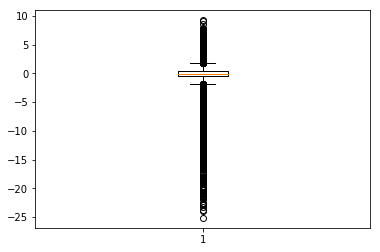

V18


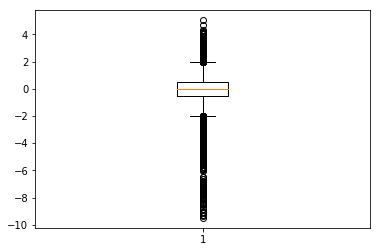

V19


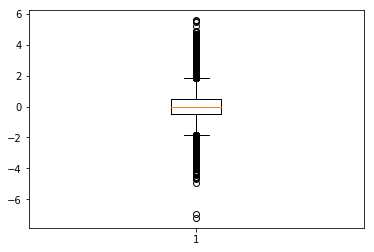

V20


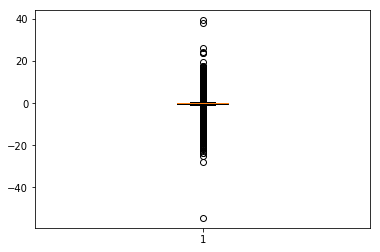

V21


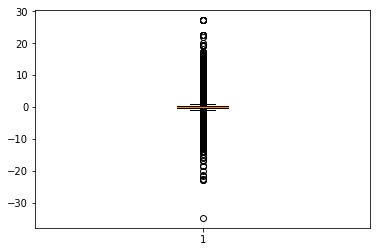

V22


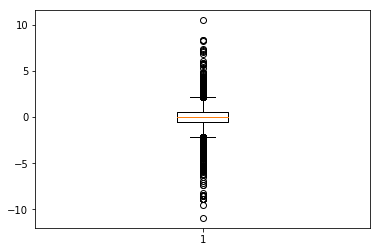

V23


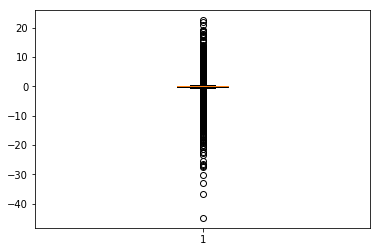

V24


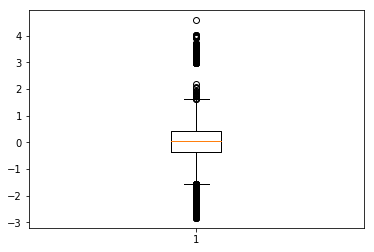

V25


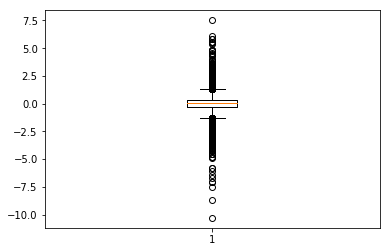

V26


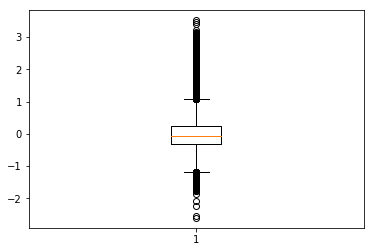

V27


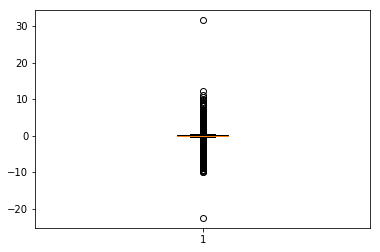

V28


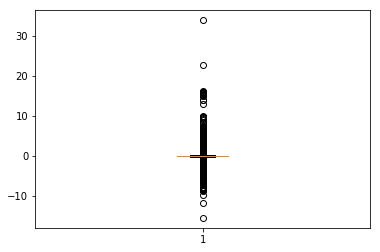

Amount


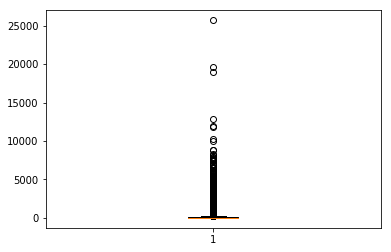

Class


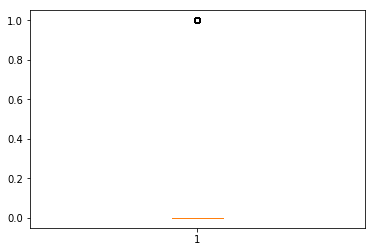

In [7]:
#plotting boxplot
%matplotlib inline
for i in data1:
    print(i)
    plt.boxplot(data1[i])
    plt.show()

In [8]:
cnames = data1.columns
cnames

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
def removeOutliers(data1, cnames):
    for i in cnames:
        print(i)
        q75, q25 = np.percentile(data1.loc[:,i], [75 ,25])
        iqr = q75 - q25

        min=q25 - (iqr*1.5)
        max=q75 + (iqr*1.5)
    
        data1 = data1.drop(data1[data1.loc[:,i]<min].index)
        data1 = data1.drop(data1[data1.loc[:,i]>max].index)
    return data1

In [10]:
data1 = removeOutliers(data1, cnames)

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount
Class


In [11]:
data1.shape

(110109, 31)

#### Outliers are Removed

In [12]:
data = pd.concat([fraudulent, data1])
data['Class'].value_counts()

0    110109
1       492
Name: Class, dtype: int64

# Feature Selection

In [13]:
#correlation analysis, plot
df_corr = data.loc[:, cnames != 'Class']

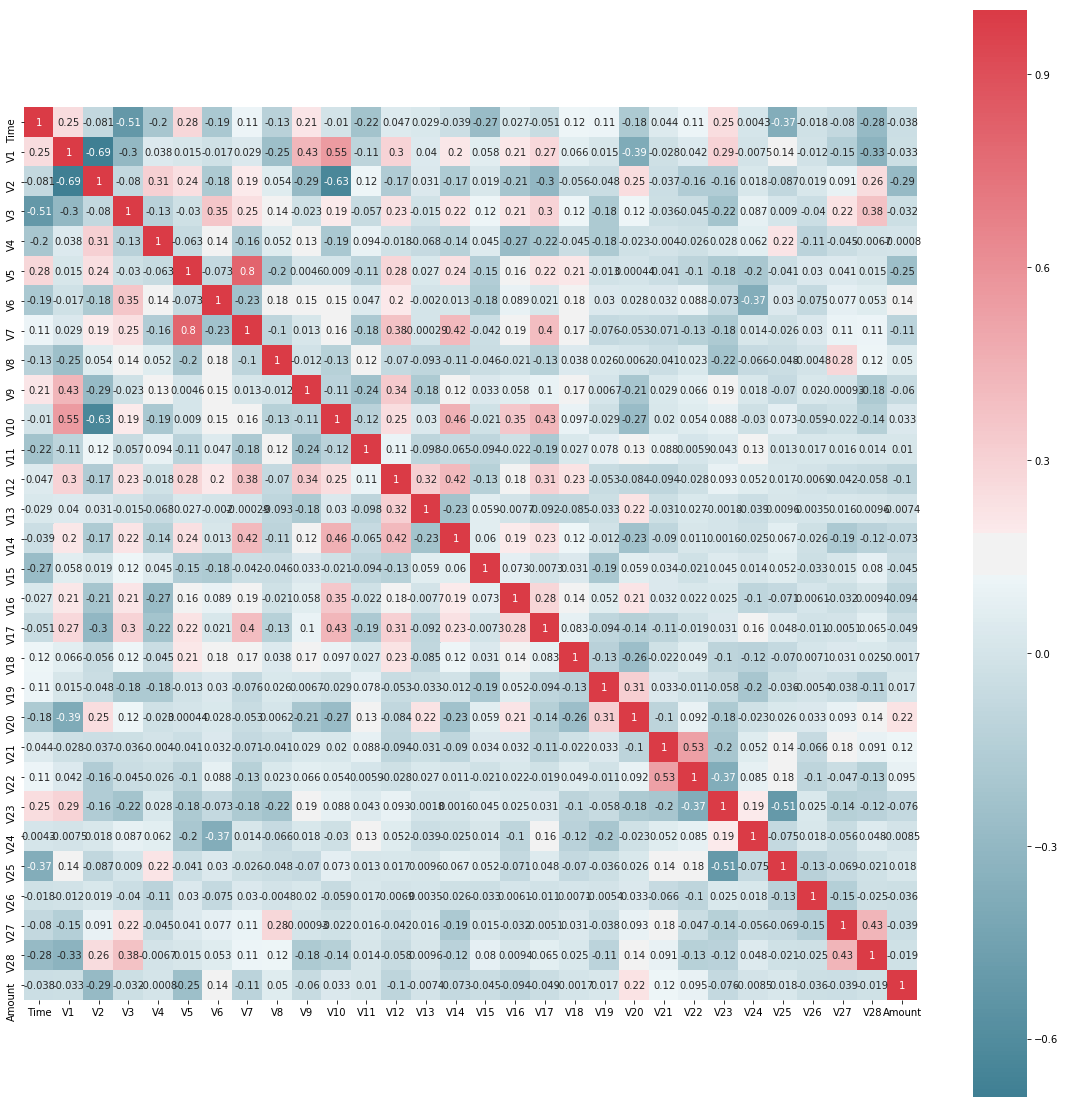

In [14]:
#set the width and height of plot
f, ax = plt.subplots(figsize=(20,20))

#generate correlation
corr = df_corr.corr()

#plot using seaborn
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot = True, ax=ax)

In [15]:
for row in corr:
    for col in corr:
        if row != col:
            if corr[row][col] > 0.85:
                print(row, '-', col, '=', corr[row][col])

#### The cutoff value taken to check highly correlated value is greater than 0.85. There is no correlated value greater than 0.85. Therefore there are no highly correlated values. 

### Since the values of the dataset are already in the range of 0 and 1, there is no need to perform Feature Scaling.

## Pie Chart to observe Transactions.

The Total Number of Fraudulent and Non-Fraudulent Transactions are : 
 0    110109
1       492
Name: Class, dtype: int64


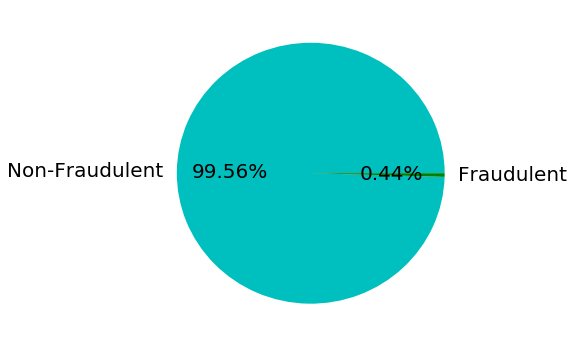

In [16]:
pie_chart = pd.Series(data['Class'].value_counts(), name = '')
pie_chart.plot.pie(labels=['Non-Fraudulent', 'Fraudulent'], colors=['c', 'g'], fontsize=20, figsize=(6, 6), autopct='%.2f%%')
a = data['Class'].value_counts()
print('The Total Number of Fraudulent and Non-Fraudulent Transactions are : \n', a)

### Here, 0 is Non-Fraudulent Transactions where as 1 is Fraudulent Transactions.

In [17]:
#dividing data to train and test
X=data.iloc[:,0:30]
Y=data.iloc[:,30]

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)

### Since the data is highly Imbalanced and Fraudulents are cost sensitive, we use different methods that handles these cases

# Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 5).fit(x_train, y_train)
RF_predict = RF.predict(x_test)

train_accuracy = RF.score(x_train, y_train)
test_accuracy = RF.score(x_test, y_test)

print('Training Accuracy is ', train_accuracy*100)
print('Testing Accuracy is ', test_accuracy*100)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Training Accuracy is  99.9922500645828
Testing Accuracy is  99.97588981646123


In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, RF_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     33022
          1       1.00      0.95      0.97       159

avg / total       1.00      1.00      1.00     33181



#### From the classification report we can undertsand that values are highly on Non-fraudulent transactions. Hence from this we do not get the result

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(x_train,y_train)
LR_predict = logistic.predict(x_test)

train_accuracy = logistic.score(x_train, y_train)
test_accuracy = logistic.score(x_test, y_test)

print('Training Accuracy is ', train_accuracy*100)
print('Testing Accuracy is ', test_accuracy*100)

Training Accuracy is  99.94575045207957
Testing Accuracy is  99.93972454115307


In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test, LR_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     33022
          1       0.99      0.88      0.93       159

avg / total       1.00      1.00      1.00     33181



#### From the classification report we can undertsand that values are highly on Non-fraudulent transactions. Hence from this we do not get the result

# KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)
KNN_predict = KNN_model.predict(x_test)

train_accuracy = KNN_model.score(x_train, y_train)
test_accuracy = KNN_model.score(x_test, y_test)

print('Training Accuracy is ', train_accuracy*100)
print('Testing Accuracy is ', test_accuracy*100)

Training Accuracy is  99.70033583053475
Testing Accuracy is  99.56300292335976


In [23]:
from sklearn import metrics
print(metrics.classification_report(y_test, KNN_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     33022
          1       0.79      0.12      0.21       159

avg / total       0.99      1.00      0.99     33181



#### From the classification report we can undertsand that values are highly on Non-fraudulent transactions. Hence from this we do not get the result

# Decision Tree Classifier

In [24]:
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier().fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)

train_accuracy = dec_tree.score(x_train, y_train)
test_accuracy = dec_tree.score(x_test, y_test)

print('Training Accuracy is ', train_accuracy*100)
print('Testing Accuracy is ', test_accuracy*100)

Training Accuracy is  100.0
Testing Accuracy is  99.96383472469185


In [25]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     33022
          1       0.97      0.96      0.96       159

avg / total       1.00      1.00      1.00     33181



#### From the classification report we can undertsand that are highly on Non-fraudulent transactions. Hence from this we do not get the result

### Therefore it is very clear that machine learning algorithms failed to predict the Fraudulent Transactions.

In [26]:
data['Class'].value_counts()

0    110109
1       492
Name: Class, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate input features (X) and target variable (y)
y = data.Class
X = data.drop('Class', axis=1)
 
# Train model
LR = LogisticRegression().fit(X, y)
 
# Predict on training set
predict_LR = LR.predict(X)
print('Accuracy is : ', accuracy_score(y, predict_LR) )

Accuracy is :  0.9991410565908084


#### Here the accuracy completely depends on the highest values. That is Non-Fraudulent Transactions. Hence This accuracy cannot be Considered.

### So, We use Resampling techniques to predict the result. The different types of resampling techniques are : 
1. Up sampled (Majority Class).      2. Down sampled (Minority Class)

# 1. Up Sampled (Majority Class)

In [28]:
from sklearn.utils import resample
# Separate majority and minority classes
data_majority = data[data.Class == 0]
data_minority = data[data.Class == 1]
 
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=110109,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
print('The new DataFrame has more observations than the original, and the ratio of the two classes is now 1:1 \n', data_upsampled.Class.value_counts())

The new DataFrame has more observations than the original, and the ratio of the two classes is now 1:1 
 1    110109
0    110109
Name: Class, dtype: int64


### Applying Logistic Regression for Up Sampled Data.

In [29]:
# Separate input features (X) and target variable (y)
y = data_upsampled.Class
X = data_upsampled.drop('Class', axis=1)
 
# Train model
LR1 = LogisticRegression().fit(X, y)

# Predict on training set
predict_LR1 = LR1.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( predict_LR1 ) )
 
# How's our accuracy?
print('Accuracy is : ', accuracy_score(y, predict_LR1) )

[0 1]
Accuracy is :  0.9595355511356928


In [30]:
from sklearn.metrics import roc_auc_score
probability = LR.predict_proba(X)
probability = [p[1] for p in probability]
 
print('Area under ROC curve is : ', roc_auc_score(y, probability) )

Area under ROC curve is :  0.9624345846260633


# 2. Down Sampled (Minority Class)

In [31]:
# Separate majority and minority classes
data_majority = data[data.Class == 0]
data_minority = data[data.Class == 1]
 
# Downsample majority class
data_majority_downsampled = resample(data_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=492,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
data_downsampled = pd.concat([data_majority_downsampled, data_minority])
 
# Display new class counts
print(' The new DataFrame has fewer observations than the original, and the ratio of the two classes is now 1:1. \n', data_downsampled.Class.value_counts())

 The new DataFrame has fewer observations than the original, and the ratio of the two classes is now 1:1. 
 1    492
0    492
Name: Class, dtype: int64


### Applying Logistic Regression for Down Sampled Data

In [32]:
# Separate majority and minority classes
y = data_downsampled.Class
X = data_downsampled.drop('Class', axis=1)
 
# Train model
LR2 = LogisticRegression().fit(X, y)

# Predict on training set
predict_LR2 = LR2.predict(X)
 
# Is our model predicting just one class?
print( np.unique( predict_LR2 ) )
 
#accuracy
print('Accuracy is : ', accuracy_score(y, predict_LR2 ) )

# Predict class probabilities
probability1 = LR2.predict_proba(X)
# Keep only the positive class
probability1 = [p[1] for p in probability1]
print('Area under ROC curve is : ',roc_auc_score(y, probability1) )

[0 1]
Accuracy is :  0.9552845528455285
Area under ROC curve is :  0.980509286800185


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report : \n', classification_report(y, predict_LR2))
print('Confusion Matrix : \n', confusion_matrix(y, predict_LR2))

Classification Report : 
              precision    recall  f1-score   support

          0       0.92      0.99      0.96       492
          1       0.99      0.92      0.95       492

avg / total       0.96      0.96      0.96       984

Confusion Matrix : 
 [[489   3]
 [ 41 451]]


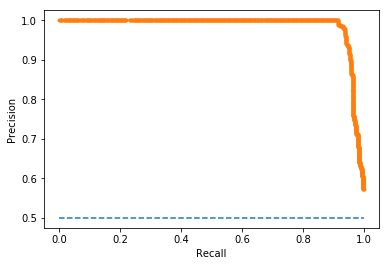

In [34]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y, probability1)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall, precision, marker='.')
plt.show()

### Applying Random Forest Classifier for Down Sampled Data.

In [35]:
from sklearn.ensemble import RandomForestClassifier
# Separate majority and minority
y = data_downsampled.Class
X = data_downsampled.drop('Class', axis=1)

RF = RandomForestClassifier().fit(X, y)
predict_RF = RF.predict(X)
 
print( np.unique( predict_RF ) )
 
print('Accuracy is : ', accuracy_score(y, predict_RF ))
 
# What about AUROC?
probability2 = RF.predict_proba(X)
probability2 = [p[1] for p in probability2]
print('Probability using Random Forest Classifier is : ', roc_auc_score(y, probability2) )

[0 1]
Accuracy is :  0.9969512195121951
Probability using Random Forest Classifier is :  1.0


In [36]:
print('Classification Report : \n', classification_report(y, predict_RF))
print('Confusion Matrix : \n', confusion_matrix(y, predict_RF))

Classification Report : 
              precision    recall  f1-score   support

          0       0.99      1.00      1.00       492
          1       1.00      0.99      1.00       492

avg / total       1.00      1.00      1.00       984

Confusion Matrix : 
 [[492   0]
 [  3 489]]


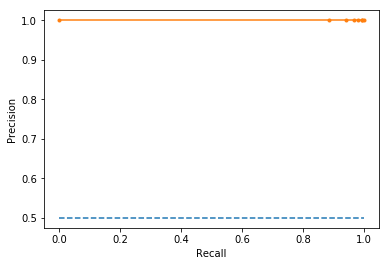

In [37]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y, probability2)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall, precision, marker='.')
plt.show()

### Applying KNN Classifier for Down Sampled Data.

In [38]:
# Separate majority and minority classes
y = data_downsampled.Class
X = data_downsampled.drop('Class', axis=1)

KNN_model = KNeighborsClassifier(n_neighbors = 3).fit(X, y)
predict_KNN = KNN_model.predict(X)

print( np.unique( predict_KNN ) )
 
print('Accuracy is : ', accuracy_score(y, predict_KNN ) )

#AUROC
probability3 = KNN_model.predict_proba(X)
probability3 = [p[1] for p in probability3]
print('Probability using KNN Classifier is : ', roc_auc_score(y, probability3) )

[0 1]
Accuracy is :  0.8445121951219512
Probability using KNN Classifier is :  0.9256952706722189


In [39]:
print('Classification Report : \n', classification_report(y, predict_KNN))
print('Confusion Matrix : \n', confusion_matrix(y, predict_KNN))

Classification Report : 
              precision    recall  f1-score   support

          0       0.81      0.89      0.85       492
          1       0.88      0.80      0.84       492

avg / total       0.85      0.84      0.84       984

Confusion Matrix : 
 [[439  53]
 [100 392]]


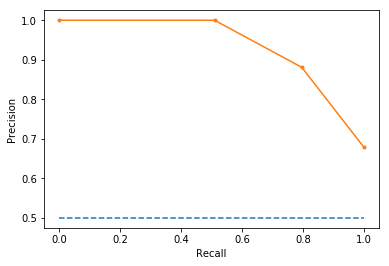

In [40]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y, probability3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

### Applying Gradient Boosting Classifier for Down Sampled Data.

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
# Separate majority and minority classes
y = data_downsampled.Class
X = data_downsampled.drop('Class', axis=1)

GB_model = GradientBoostingClassifier(n_estimators = 100).fit(X, y)
predict_GB = GB_model.predict(X)

print( np.unique( predict_GB ) )
 
print('Accuracy is : ', accuracy_score(y, predict_GB ) )

#AUROC
probability4 = GB_model.predict_proba(X)
probability4 = [p[1] for p in probability4]
print('Probability using Gradient Boosting Classifier is : ', roc_auc_score(y, probability4) )

[0 1]
Accuracy is :  1.0
Probability using Gradient Boosting Classifier is :  1.0


In [42]:
print('Classification Report : \n', classification_report(y, predict_GB))
print('Confusion Matrix : \n', confusion_matrix(y, predict_GB))

Classification Report : 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       492
          1       1.00      1.00      1.00       492

avg / total       1.00      1.00      1.00       984

Confusion Matrix : 
 [[492   0]
 [  0 492]]


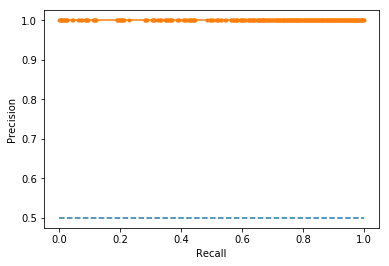

In [43]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y, probability4)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall, precision, marker='.')
plt.show()

### The accuracy predicted before applying resampling technique was based on highest value i.e., Majority class, hence it was not taken to consideration. Therefore we applied Resampling technique and then calculated minority and majority class probabilities. Further, Applied different Classifier Algorithms on Re-sampled data and generated classification report. Precision, Recall and F1score must be considered for measuring the performance of the model for imbalanced dataset.

#### For this dataset, Logistic Regression, Gradient Boosting Classifier and Random Forest Classifier gives the Good Result based on Classification Report. But when we see Precision-Recall Curve and Confusion Matrix,  Random Forest Classifier and Gradient Boosting Classifier gives a better result than other classifiers because in other classifiers there are more overlapping values in the curve.

### From this we can indentify the fraudulent transcations.

### DONE